## Context and goals:
Brazil has 24.000 dams. The government is making a effort to control and label the dams according to low, medium and high risk, but there are two big problems: 1. the risk criteria demands several features that are hard to collect and measure; 2. the governemnt does not have enough regulatory institutions and qualified workers to visit all of them, collect information and label the risk manually.  
Therefore, this project goal will be pre-label as many dams as possible, so the government can focus on prioritize the inspection on the higher risk ones. 

## To dos:

1. Drop unrelated columns
2. Check nulls
3. text cleaning

1. prepare categorical data (one-hot- enconding)
2. organize numerical data (standard scaler)
3. study the 'less features' thing

1. to go further: there are only 10 accidents in BR (I can't find the number of incidents). Is it possible to predict the probabilities for the next one with the poor dataset that I have?


## Libraries and Dataframe

In [352]:
import pandas as pd
import numpy as np
import seaborn as sns

In [353]:
pd.set_option('display.max_rows', 100)
df = pd.read_excel('SNISB 2018.xlsx', sheet_name='Cadastro')

In [354]:
#df.isnull().sum().sort_values()

## drop columns
not necesseary features to execute machine learning
(but necessary for statiscal graphs, specially to show the precarious control situation)

In [355]:
#deleted because this is register info
df.drop(columns=['Codigo_barragem_Fiscalizador', 'Autorizacao_Numero',
                 'CNARH_Numero', 'Barragem_NomeSecundario', 'Empreendedor_Nome',
                 'Empreendedor_Sigla', 'Empreendedor_CNPJ',
       'Empreendedor_CPF', 'Empreendedor_endereco', 'Empreendedor _e-mail',
       'Empreendedor_telefone', 'Empreendedor_telefone alternativo',             
                 'Cursodagua_barrado', 'Bacia_Hidrografica', 'UnidadeGestaoRecursosHidricos',
                 'Datum', 'Empreendedor Identificado?'], inplace=True)

In [356]:
#deleted because this is unnecessary info for machine learning
df.drop(columns=['Codigo_barragem_SNISB','Autorizacao_Data_emissao_publicacao',
           'Autorizacao_Data_validade','Uso_Complementar','Regiao_Hidrografica_CNRH','Latitude_dec',
           'Longitude_dec','Dominio_Curso_Dagua','DataUltimaInspecao','TipoUltimaInspecao',
           'ComentariosObservacoes','Órgão fiscalizador','Barragem Pública ou particular','Barragem Outorgada?',
           'Tem informação de altura?','Tem informação de volume?','Tem informação de altura e volume?',
           'classificada quanto ao CRI?','classificada quanto ao DPA?','Houve alguma inspeção no período deste RSB?',
           'Cadastrada no SNISB?','N','sequência'], inplace=True)

In [357]:
#deleted because there are too many nulls when filtering by risk criteria
df.drop(columns=['Construcao_Data_Inicio', 'Barragem_Altura_AcimaBaseFundacao','Classe Residuo', 'Barragem_nivel_de_perigo',
                 'Barragem_Classe', 'DataUltimaFiscalização', 'Barragem_Principal_Tipo_estrutural'], inplace = True)

## Dtype organization

In [358]:
# ISSUE !!!! FORM SUBMITTED.
# I only want (and really need) the years,but this series is a mess. I don't know how to loop that.

df['Construcao_Data_Fim'].unique()

array([nan, datetime.datetime(1999, 3, 1, 0, 0),
       datetime.datetime(2016, 12, 29, 0, 0), ...,
       datetime.datetime(1992, 9, 1, 0, 0),
       datetime.datetime(1994, 3, 21, 0, 0),
       datetime.datetime(2012, 9, 26, 0, 0)], dtype=object)

In [359]:
df["Barragem_Altura_AcimaNivelTerreno"] = pd.to_numeric(df["Barragem_Altura_AcimaNivelTerreno"], errors='coerce')

In [360]:
df["Barragem_Capacidade"] = pd.to_numeric(df["Barragem_Capacidade"], errors='coerce')

In [361]:
#df.dtypes

## Text cleaning 

In [362]:
df['Barragem_Principal_Tipo_material'] = df['Barragem_Principal_Tipo_material'].str.lower()
df['Barragem_Principal_Tipo_material'] = df['Barragem_Principal_Tipo_material'].replace('terra ','terra')
df['Barragem_Principal_Tipo_material'] = df['Barragem_Principal_Tipo_material'].replace('alvenaria ','alvenaria')
df['Barragem_Principal_Tipo_material'] = df['Barragem_Principal_Tipo_material'].replace('sem informação', np.nan)
df['Barragem_Principal_Tipo_material'].value_counts()
df['Barragem_Principal_Tipo_material'].isnull().sum() #10735 nulls

10735

In [363]:
df['Uso_principal'] = df['Uso_principal'].str.lower()
df['Uso_principal'].value_counts()
df['Uso_principal'].isnull().sum() #0 nulls

0

In [364]:
df['Barragem_UF'] = df['Barragem_UF'].str.upper()
df['Barragem_UF'].value_counts()
df['Barragem_UF'].isnull().sum()

0

In [365]:
df['Barragem_Categoria_Risco'] = df['Barragem_Categoria_Risco'].str.lower()
df['Barragem_Categoria_Risco'] = df['Barragem_Categoria_Risco'].replace('médio ','médio')
df['Barragem_Categoria_Risco'] = df['Barragem_Categoria_Risco'].replace('baixo ','baixo')
df['Barragem_Categoria_Risco'] = df['Barragem_Categoria_Risco'].replace('não classificada', np.nan)
df['Barragem_Categoria_Risco'].value_counts()
df['Barragem_Categoria_Risco'].isnull().sum() #12518 nulls

12518

In [366]:
df['Barragem_Dano_Potencial_Associado'] = df['Barragem_Dano_Potencial_Associado'].str.lower()
df['Barragem_Dano_Potencial_Associado'] = df['Barragem_Dano_Potencial_Associado'].replace('médio ','médio')
df['Barragem_Dano_Potencial_Associado'] = df['Barragem_Dano_Potencial_Associado'].replace('baixo ','baixo')
df['Barragem_Dano_Potencial_Associado'] = df['Barragem_Dano_Potencial_Associado'].replace('não classificada', np.nan)
df['Barragem_Dano_Potencial_Associado'].unique()
df['Barragem_Dano_Potencial_Associado'].value_counts()
df['Barragem_Dano_Potencial_Associado'].isnull().sum() #11027 nulls

11027

In [367]:
df['TemPAE'] = df['TemPAE'].str.lower()
df['TemPAE'] = df['TemPAE'].replace('não ','não')
df['TemPAE'] = df['TemPAE'].replace('nãose aplica','não se aplica')
df['TemPAE'] = df['TemPAE'].replace('sem informação',np.nan)
df['TemPAE'].value_counts()
df['TemPAE'].isnull().sum() #11199 nulls

11199

In [368]:
df['TemPlanoSeguranca'] = df['TemPlanoSeguranca'].str.lower()
df['TemPlanoSeguranca'] = df['TemPlanoSeguranca'].replace('sem informação',np.nan)
df['TemPlanoSeguranca'].value_counts()
df['TemPlanoSeguranca'].isnull().sum() #11140 nulls

11140

In [369]:
df['TemRevisaoPeriodica'] = df['TemRevisaoPeriodica'].str.lower()
df['TemRevisaoPeriodica'] = df['TemRevisaoPeriodica'].replace('sem informação',np.nan)
df['TemRevisaoPeriodica'].value_counts()
df['TemRevisaoPeriodica'].isnull().sum() #11883 nulls

11883

In [370]:
df['VazaoProjeto_OrgaoExtravasor'] = df['VazaoProjeto_OrgaoExtravasor'].replace('Desconhecido',np.nan)
df["VazaoProjeto_OrgaoExtravasor"] = pd.to_numeric(df["VazaoProjeto_OrgaoExtravasor"], errors='coerce')
df['VazaoProjeto_OrgaoExtravasor'].isnull().sum() #16280

16280

In [374]:
# TODO check criteria, because NaN is 'Desconhecido'and worth points.
df['CriterioVazaoProjeto_OrgaoExtravasor'] = df['CriterioVazaoProjeto_OrgaoExtravasor'].replace(10000,'Cheia Máxima Provável')
df['CriterioVazaoProjeto_OrgaoExtravasor'] = df['CriterioVazaoProjeto_OrgaoExtravasor'].replace(1000,'Milenar')
df['CriterioVazaoProjeto_OrgaoExtravasor'] = df['CriterioVazaoProjeto_OrgaoExtravasor'].replace(5000,'Não Confiável')
df['CriterioVazaoProjeto_OrgaoExtravasor'] = df['CriterioVazaoProjeto_OrgaoExtravasor'].replace('< 500','Não Confiável')
df['CriterioVazaoProjeto_OrgaoExtravasor'] = df['CriterioVazaoProjeto_OrgaoExtravasor'].replace('desconhecido',np.nan)
df['CriterioVazaoProjeto_OrgaoExtravasor'] = df['CriterioVazaoProjeto_OrgaoExtravasor'].replace('Desconhecido',np.nan)
df['CriterioVazaoProjeto_OrgaoExtravasor'].value_counts()


Cheia Máxima Provável    998
Não Confiável            459
Milenar                  320
Name: CriterioVazaoProjeto_OrgaoExtravasor, dtype: int64

In [ ]:

CriterioVazaoProjeto_OrgaoExtravasor
ExtravasorControle
TemProjetoExecutivo
TemProjetoComo construido
TemProjetoBasico
TemProjetoConceitual
TemEclusa
Barragem_FasedeVida
ReguladaPNSB
Barragem_autuada?

In [ ]:
#check what is left:
dropnas = df.dropna()
dropnas # only 567 dams have every all the information filled.
dropnas.columns

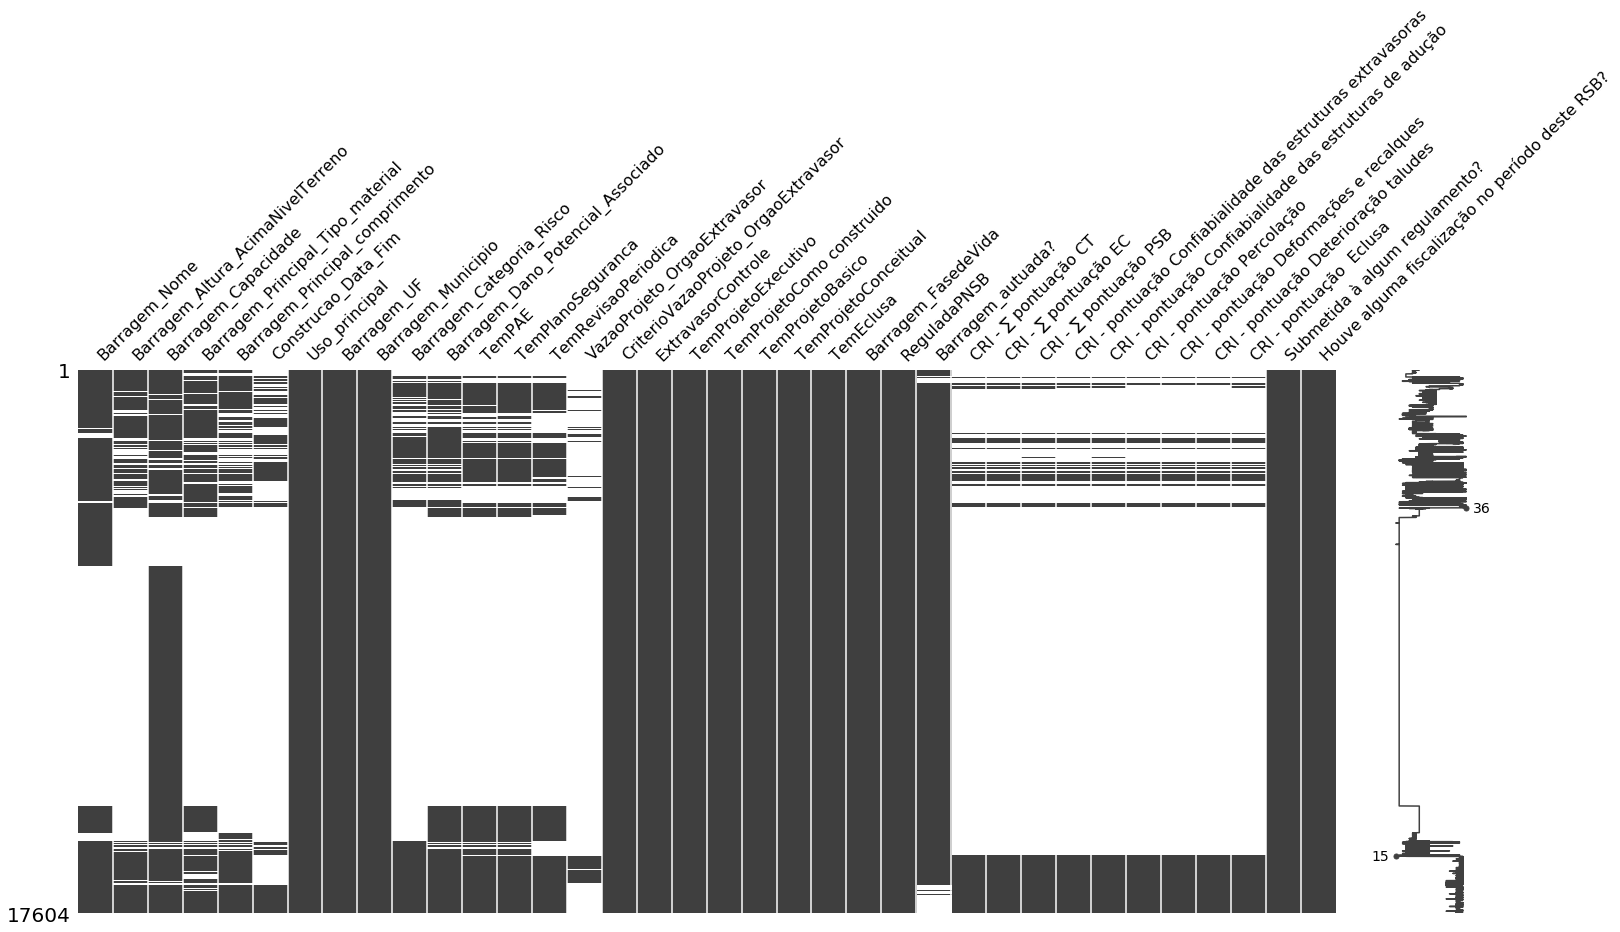

In [271]:
import missingno as msno
msno.matrix(df)